<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B43_E22CSEU1276_AbhayRaj/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2

In [6]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

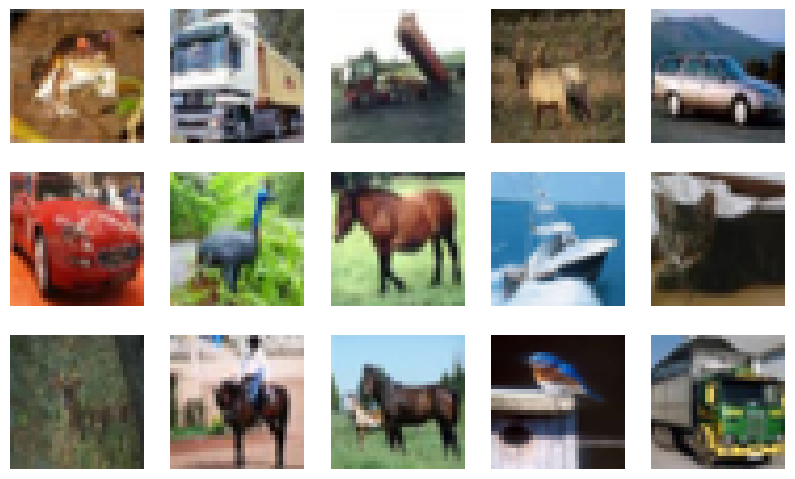

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis("off")

plt.show()

In [8]:
def add_noise_blur(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
    return blurred_image

deg_x_train = np.array([add_noise_blur(img) for img in x_train])
deg_x_test = np.array([add_noise_blur(img) for img in x_test])

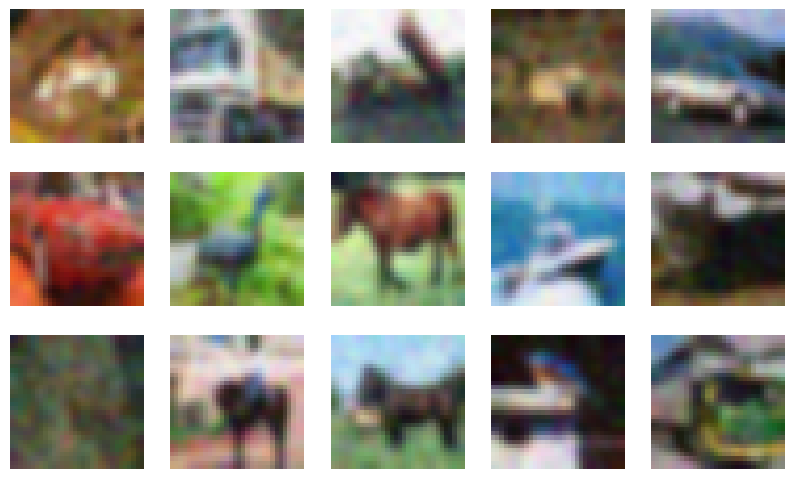

In [9]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(deg_x_train[i])
    ax.axis("off")

plt.show()

In [10]:
def build_autoencoder():
    input_img = Input(shape=(32, 32, 3))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    return autoencoder


In [11]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer=Adam(), loss='mse')

In [12]:
autoencoder.fit(deg_x_train, x_train, epochs=10, batch_size=128, validation_data=(deg_x_test, x_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0212 - val_loss: 0.0066
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0041 - val_loss: 0.0040


In [13]:
predicted = autoencoder.predict(deg_x_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


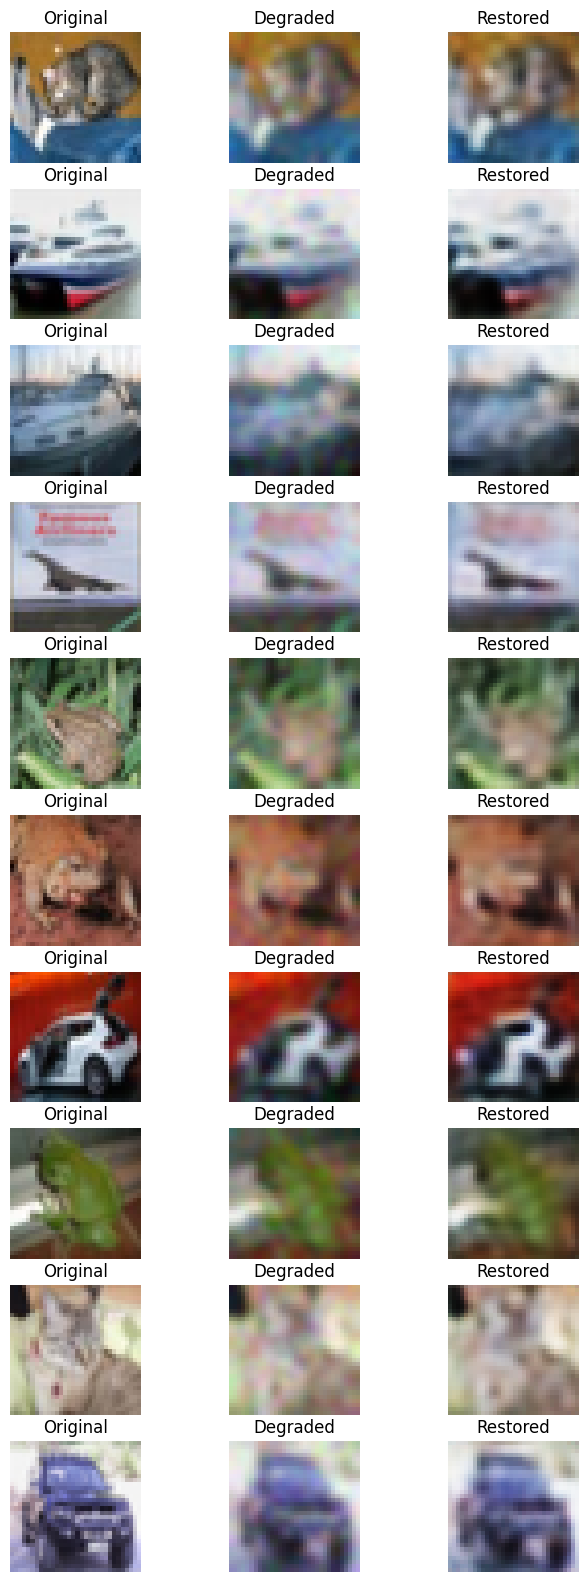

Average PSNR: 24.085398487963296


In [14]:
fig, axes = plt.subplots(10, 3, figsize=(8, 20))
for i in range(10):
    axes[i, 0].imshow(x_test[i])
    axes[i, 0].set_title("Original")
    axes[i, 1].imshow(deg_x_test[i])
    axes[i, 1].set_title("Degraded")
    axes[i, 2].imshow(predicted[i])
    axes[i, 2].set_title("Restored")

    for j in range(3):
        axes[i, j].axis("off")

plt.show()

# Evaluate using PSNR
def psnr(original, restored):
    mse = np.mean((original - restored) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

psnr_values = [psnr(x_test[i], predicted[i]) for i in range(10)]
print("Average PSNR:", np.mean(psnr_values))

In [15]:
img = cv2.imread("/content/test.png")


In [16]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
img = img / 255.0

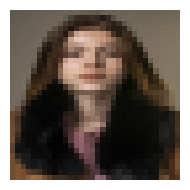

In [17]:
plt.figure(figsize=(2, 2))
plt.axis("off")
plt.tight_layout()
plt.imshow(resized_img)


In [18]:
noise = np.random.normal(loc=0, scale=0.1, size=img.shape)
noisy_image = np.clip(img + noise, 0, 1)  # Add noise
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)  # Apply blur

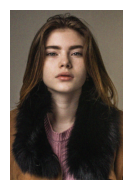

In [19]:
plt.figure(figsize=(2, 2))
plt.axis("off")
plt.tight_layout()
plt.imshow(blurred_image)

In [20]:
input = np.expand_dims(blurred_image, axis=0)
restored = autoencoder.predict(input)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


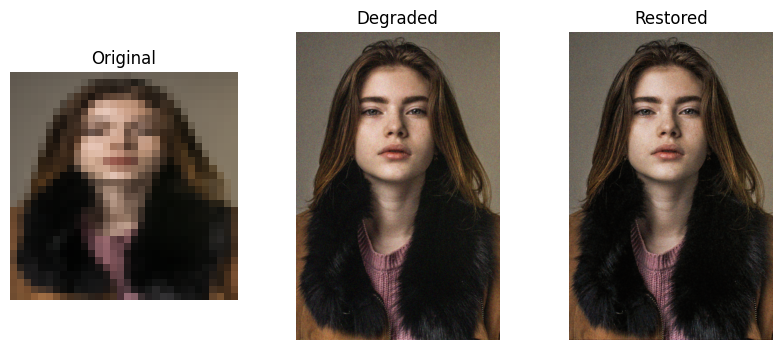

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(resized_img)
axes[0].set_title("Original")
axes[1].imshow(blurred_image)
axes[1].set_title("Degraded")
axes[2].imshow(restored)
axes[2].set_title("Restored")

for ax in axes:
    ax.axis("off")

plt.show()

Task2 : Classification

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

In [23]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [24]:
def build_alexnet():
    model = Sequential([
        Conv2D(96, (11,11), strides=4, activation='relu', input_shape=(32,32,3), padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Conv2D(256, (5,5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Conv2D(384, (3,3), activation='relu', padding='same'),
        Conv2D(384, (3,3), activation='relu', padding='same'),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])

    return model

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

alexnet_pretrained = build_alexnet()

vgg_conv_layers = [layer for layer in vgg16.layers if 'conv' in layer.name][1:5]  # Skip first layer
alexnet_conv_layers = [layer for layer in alexnet_pretrained.layers if 'conv' in layer.name][1:]  # Skip first layer

# Ensure layer count matches
assert len(vgg_conv_layers) == len(alexnet_conv_layers), "Mismatch in layer count!"

# Transfer Weights for Convolutional Layers (Skipping First Layer)
for vgg_layer, alex_layer in zip(vgg_conv_layers, alexnet_conv_layers):
    if vgg_layer.get_weights()[0].shape == alex_layer.get_weights()[0].shape:  # Check shape compatibility
        alex_layer.set_weights(vgg_layer.get_weights())
        alex_layer.trainable = False  # Freeze them


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='softmax')(x)

vgg16 = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
alexnet_pretrained.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
import time

In [28]:
def train_and_evaluate(model, name):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
    end_time = time.time()
    inference_time = end_time - start_time
    print(f"{name} Training Time: {inference_time:.2f} sec")
    return history, inference_time

In [29]:
history_alexnet, time_alexnet = train_and_evaluate(alexnet_pretrained, "AlexNet")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.0188 - loss: 4.4696 - val_accuracy: 0.0517 - val_loss: 4.0578
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0656 - loss: 3.9921 - val_accuracy: 0.1098 - val_loss: 3.7675
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1108 - loss: 3.7209 - val_accuracy: 0.1372 - val_loss: 3.5856
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1471 - loss: 3.5045 - val_accuracy: 0.1694 - val_loss: 3.3989
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1849 - loss: 3.2871 - val_accuracy: 0.2064 - val_loss: 3.2478
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2145 - loss: 3.1259 - val_accuracy: 0.2205 - val_loss: 3.1931
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2449 - loss: 2.9575 - val_accuracy: 0.2273 - val_loss: 3.1547
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2764 - loss: 2.8012 - v

In [30]:
history_vgg16, time_vgg16 = train_and_evaluate(vgg16, "VGG16")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.1292 - loss: 3.8383 - val_accuracy: 0.2817 - val_loss: 2.9428
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2613 - loss: 2.9954 - val_accuracy: 0.3168 - val_loss: 2.7565
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2952 - loss: 2.8188 - val_accuracy: 0.3270 - val_loss: 2.6699
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3157 - loss: 2.7113 - val_accuracy: 0.3355 - val_loss: 2.6242
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3275 - loss: 2.6400 - val_accuracy: 0.3466 - val_loss: 2.5899
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3405 - loss: 2.5890 - val_accuracy: 0.3522 - val_loss: 2.5594
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3515 - loss: 2.5171 - val_accuracy: 0.3553 - val_loss: 2.5349
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3600 - loss: 2.4732 - 

In [31]:
def plot_history(history, model_name):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

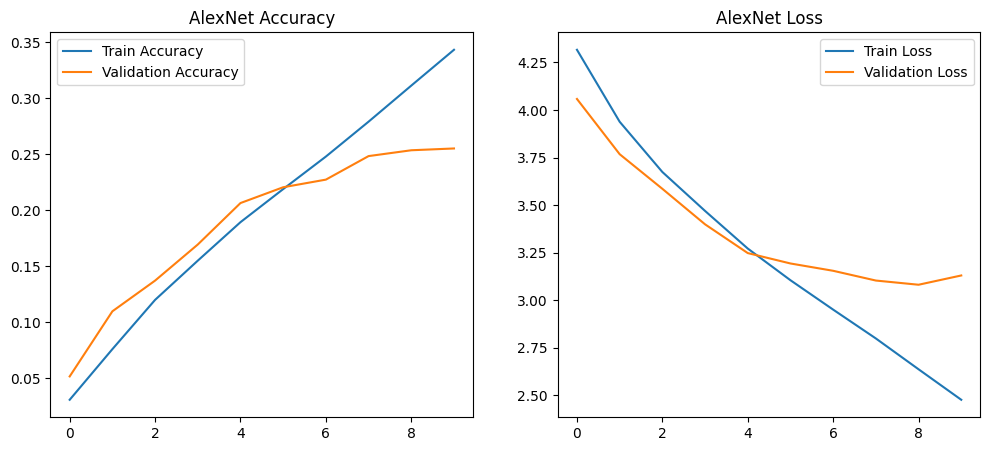

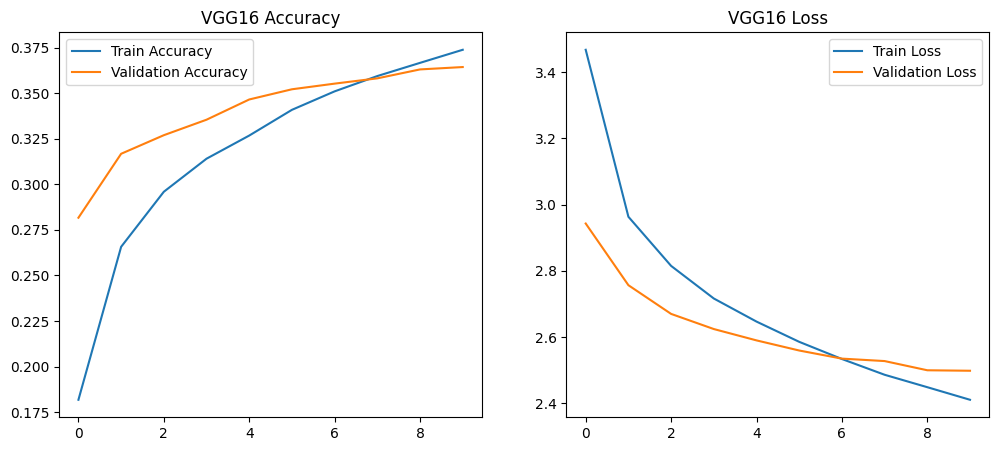

AlexNet Inference Time: 113.10 sec
VGG16 Inference Time: 158.84 sec


In [32]:
plot_history(history_alexnet, "AlexNet")
plot_history(history_vgg16, "VGG16")

print(f"AlexNet Inference Time: {time_alexnet:.2f} sec")
print(f"VGG16 Inference Time: {time_vgg16:.2f} sec")